In [1]:
############### Importing required libraries ###############
import numpy as np
import pandas as pd
import keras
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
%matplotlib inline

Using TensorFlow backend.


/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_dataset_Summary.csv
/kaggle/input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person1676_virus_2892.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/NORMAL2-IM-0336-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person1650_virus_2852.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person22_virus_55.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/IM-0101-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/person122_bacteria_582.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coron

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1180_virus_2010.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1230_virus_2081.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1513_virus_2632.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0771-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person124_virus_238.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person746_virus_1369.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person588_bacteria_2422.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronah

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person978_virus_1653.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person564_bacteria_2344.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0290-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1618_bacteria_4258.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-1182-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person60_bacteria_287.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person984_bacteria_2911.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahac

/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-0572-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1816_bacteria_4673.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person830_bacteria_2741.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person376_bacteria_1716.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person1104_virus_1826.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/NORMAL2-IM-1260-0001.jpeg
/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/person798_virus_1430.jpeg
/kaggle/input/coronahack-chest-xraydataset/C

In [ ]:
############### printing all the files available ###############
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
############### reading data from chest-xray-dataset using pandas ###############
data=pd.read_csv('../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')
data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [3]:
############### required file path to the dataset ###############
file_path='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/'

In [4]:
############### Adding file path to data ###############
data['FilePath']=''
data.loc[data['Dataset_type']=='TRAIN','FilePath']=file_path+'train/'
data.loc[data['Dataset_type']=='TEST','FilePath']=file_path+'test/'
data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...


In [5]:
############### Adding image path to data ###############
data['img_path']=data['FilePath']+data['X_ray_image_name']
data.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath,img_path
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...


In [6]:
############### Filter training data ###############
train=data[(data['Dataset_type']=='TRAIN') & ((data['Label']=='Normal') | (data['Label_2_Virus_category']=='COVID-19'))]
train.loc[train['Label']=='Pnemonia','Label']='COVID-19'
train=pd.concat([train,pd.get_dummies(train['Label'],prefix='Label')],axis=1)
normal_train=train[train['Label']=='Normal']
covid_train=train[train['Label']=='COVID-19']
temp_covid=covid_train.sample(20)
covid_train=covid_train[~covid_train['X_ray_image_name'].isin(temp_covid['X_ray_image_name'])]
print("Number of normal samples in train = "+str(len(normal_train)))
print("Number of covid samples in train = "+str(len(covid_train)))

Number of normal samples in train = 1342
Number of covid samples in train = 38


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
############### printing random 5 rows of training data which have label assigned as "Normal" ###############
normal_train.sample(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath,img_path,Label_COVID-19,Label_Normal
109,109,IM-0240-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
1018,1018,NORMAL2-IM-0945-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
18,18,IM-0168-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
864,864,NORMAL2-IM-0698-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
1028,1028,NORMAL2-IM-1008-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1


In [8]:
############### printing random 5 rows of training data which have label assigned as "COVID-19" ###############
covid_train.sample(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath,img_path,Label_COVID-19,Label_Normal
5261,5276,44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,1,0
5262,5277,446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,1,0
5225,5234,jkms-35-e79-g001-l-c.jpg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,1,0
5230,5239,all14238-fig-0001-m-b.jpg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,1,0
5256,5268,6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,1,0


In [51]:
############### printing random 5 rows of training data ###############
train.sample(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath,img_path,Label_COVID-19,Label_Normal
109,109,IM-0240-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
680,680,NORMAL2-IM-0443-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
51,51,IM-0225-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
319,319,IM-0524-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
1097,1097,NORMAL2-IM-1086-0001.jpeg,Normal,TRAIN,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1


In [9]:
############### Filter test data ###############
test=data[(data['Dataset_type']=='TEST') & ((data['Label']=='Normal') | (data['Label_2_Virus_category']=='COVID-19'))]
test.loc[test['Label']=='Pnemonia','Label']='COVID-19'
normal_test=test[test['Label']=='Normal']
covid_test=test[test['Label']=='COVID-19']
temp_covid=temp_covid.drop(['Label_Normal','Label_COVID-19'],axis=1)
covid_test=pd.concat([covid_test,temp_covid])
test=pd.concat([normal_test,covid_test])
test=pd.concat([test,pd.get_dummies(test['Label'],prefix='Label')],axis=1)
test.loc[test['Dataset_type']=='TRAIN','Dataset_type']='TEST'
print("Number of normal samples in test = "+str(len(normal_test)))
print("Number of covid samples in test = "+str(len(covid_test)))

Number of normal samples in test = 234
Number of covid samples in test = 20


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
############### printing random 5 rows of testing data which have label assigned as "Normal" ###############
normal_test.sample(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath,img_path
5293,5316,IM-0011-0001-0002.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5440,5463,NORMAL2-IM-0233-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5374,5397,IM-0023-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5324,5347,IM-0110-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5317,5340,NORMAL2-IM-0027-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...


In [48]:
############### printing random 5 rows of testing data which have label assigned as "COVID-19" ###############
covid_test.sample(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath,img_path
5260,5275,4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5282,5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5239,5249,F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5247,5258,93FE0BB1-022D-4F24-9727-987A07975FFB.jpeg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...
5283,5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,COVID-19,TRAIN,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...


In [50]:
############### printing random 5 rows of testing data ###############
test.sample(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category,FilePath,img_path,Label_COVID-19,Label_Normal
5252,5264,7E335538-2F86-424E-A0AB-6397783A38D0.jpeg,COVID-19,TEST,COVID-19,Virus,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,1,0
5354,5377,IM-0059-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
5465,5488,NORMAL2-IM-0132-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
5297,5320,IM-0007-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1
5331,5354,IM-0099-0001.jpeg,Normal,TEST,NaN,NaN,../input/coronahack-chest-xraydataset/Coronaha...,../input/coronahack-chest-xraydataset/Coronaha...,0,1


In [11]:
############### preparing training and test data ###############
def prepare_data(label):
    if label=='normal_train':
        dataset=np.zeros((normal_train.shape[0],224,224,3),dtype='int')
        l=normal_train
    elif label=='covid_train':
        dataset=np.zeros((covid_train.shape[0],224,224,3),dtype='int')
        l=covid_train
    elif label=='test':
        dataset=np.zeros((test.shape[0],224,224,3),dtype='int')
        l=test
    for idx,img_path in enumerate(l['img_path']):
        img=image.imread(img_path)
        if len(img.shape)!=3:
            img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        resized=cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
        if resized.shape[2]!=3:
            resized=resized[:,:,:3]
        dataset[idx]=resized
    y=np.array(l[['Label_Normal','Label_COVID-19']])
    return dataset,y

In [12]:
############### preparing training data for class "Normal" and performing normalization ###############
x_normal_train,y_normal_train=prepare_data('normal_train')
x_normal_train=x_normal_train/255.
print(x_normal_train.shape,y_normal_train.shape)

(1342, 224, 224, 3) (1342, 2)


In [13]:
############### preparing training data for class "COVID-19" and performing normalization ###############
x_covid_train,y_covid_train=prepare_data('covid_train')
x_covid_train=x_covid_train/255.
print(x_covid_train.shape,y_covid_train.shape)

(38, 224, 224, 3) (38, 2)


In [14]:
############### preparing testing data and performing normalization ###############
x_test,y_test=prepare_data('test')
x_test=x_test/255.
print(x_test.shape,y_test.shape)

(254, 224, 224, 3) (254, 2)


In [15]:
############### setting Data Augmentation parameters ###############
datagen=ImageDataGenerator(rotation_range=40,
    horizontal_flip=True)

In [16]:
############### Creating iterator for data augmentation ###############
it=datagen.flow(x_normal_train[:50],batch_size=1)

In [17]:
############### Preparing for data augmentation ###############
def prepare_aug(it):
    x_aug_train=[]
    for i in range(len(it)):
        batch=it.next()
        x_aug_train.append(batch[0])
    x_aug_train=np.array(x_aug_train)
    return x_aug_train

x_aug_train = prepare_aug(it)
print(x_aug_train.shape)

(50, 224, 224, 3)


In [18]:
############### Performing data augmentation for training data having class="Normal" ###############
x_normal_train=np.concatenate((x_normal_train,x_aug_train),axis=0)
y_normal_train=np.concatenate((y_normal_train,y_normal_train[:50]),axis=0)
print(x_normal_train.shape,y_normal_train.shape)

(1392, 224, 224, 3) (1392, 2)


In [19]:
############### Performing data augmentation for training data having class="COVID-19" ###############
x_aug_covid_train=[]
for i in range(15):
    it=datagen.flow(x_covid_train,batch_size=1)
    x_aug_train=prepare_aug(it)
    x_aug_covid_train.extend(x_aug_train)
x_covid_train=np.copy(x_aug_covid_train)
y_covid_train=np.tile(y_covid_train,(15,1))
print(x_covid_train.shape,y_covid_train.shape)

(570, 224, 224, 3) (570, 2)


In [20]:
############### Training data prepared with augmentation ###############
x_train=np.concatenate((x_normal_train,x_covid_train),axis=0)
y_train=np.concatenate((y_normal_train,y_covid_train),axis=0)
print(x_train.shape,y_train.shape)

(1962, 224, 224, 3) (1962, 2)


In [21]:
############### Binary classification classes: Normal and COVID-19 ###############
class_names=['Normal','COVID-19']

In [22]:
############### Plotting random samples from data and its corresponding class label ###############
def show_random_examples(x,y,p):
    indices=np.random.choice(range(x.shape[0]),38,replace=False)
    x=x[indices]
    y=y[indices]
    p=p[indices]
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i]),plt.xticks([]),plt.yticks([])
        col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()

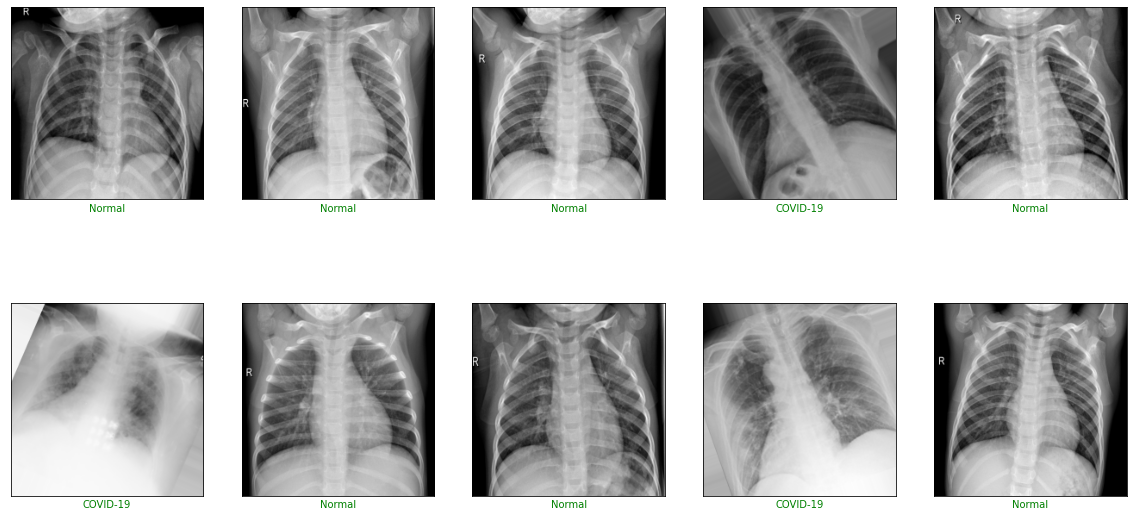

In [23]:
############### 10 Random samples are displayed from training data along with their class label ###############
show_random_examples(x_train,y_train,y_train)

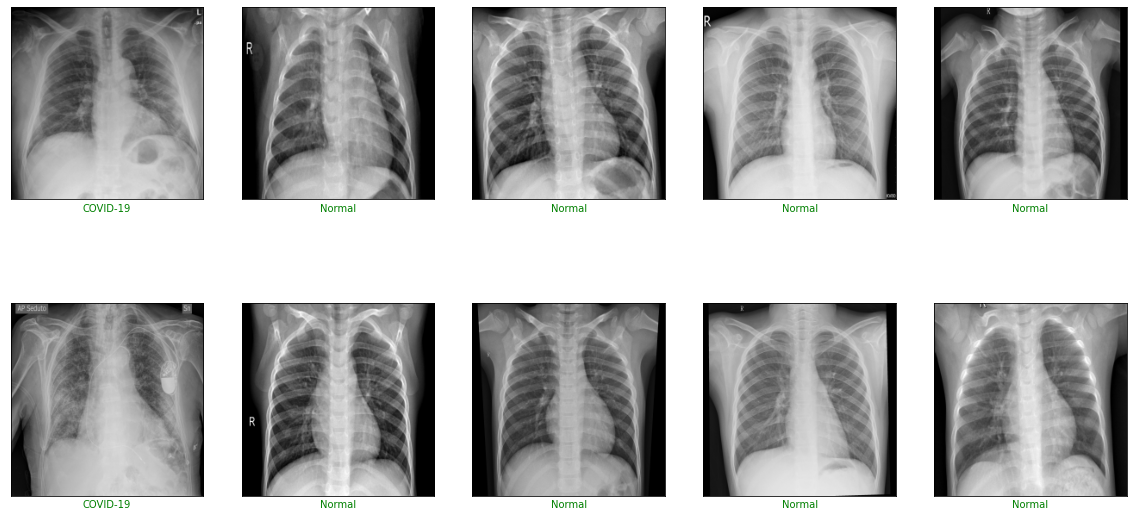

In [25]:
############### 10 Random samples are displayed from testing data along with their class label ###############
show_random_examples(x_test,y_test,y_test)

In [27]:
############### First model is built using tranfer learning from VGG16 ###############
def create_model_vgg():
    prior = VGG16(
        include_top=False, 
        weights='imagenet',pooling='avg',
        input_shape=(224, 224, 3))
    model = tf.keras.Sequential()
    model.add(prior)
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    model.layers[0].trainable=False
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model_vgg=create_model_vgg()
model_vgg.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [28]:
############### creating output directory to store models which yield high validation accuracy ###############
if not os.path.isdir('/kaggle/working/model_vgg/'):
    os.mkdir('/kaggle/working/model_vgg/')
file_path='/kaggle/working/model_vgg/'

In [29]:
############### training model built from VGG16 ###############
%%time
h_vgg=model_vgg.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          epochs=5,batch_size=64,
          callbacks=[
        ModelCheckpoint(os.path.join(file_path,'model_{val_accuracy:.3f}.h5'), save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Train on 1962 samples, validate on 254 samples
Epoch 1/5
1962/1962 [==============================] - 14s 7ms/sample - loss: 0.5675 - accuracy: 0.7138 - val_loss: 0.3238 - val_accuracy: 0.9252
Epoch 2/5
1962/1962 [==============================] - 6s 3ms/sample - loss: 0.4738 - accuracy: 0.7752 - val_loss: 0.2991 - val_accuracy: 0.9311
Epoch 3/5
1962/1962 [==============================] - 6s 3ms/sample - loss: 0.4096 - accuracy: 0.8183 - val_loss: 0.2769 - val_accuracy: 0.9429
Epoch 4/5
1962/1962 [==============================] - 6s 3ms/sample - loss: 0.3581 - accuracy: 0.8512 - val_loss: 0.2555 - val_accuracy: 0.9528
Epoch 5/5
1962/1962 [==============================] - 6s 3ms/sample - loss: 0.3212 - accuracy: 0.8769 - val_loss: 0.2385 - val_accuracy: 0.9587
CPU times: user 16.5 s, sys: 14 s, total: 30.6 s
Wall time: 41.7 s


In [30]:
############### load the model from output directory which has maximum validation accuracy ###############
model_vgg=tf.keras.models.load_model('/kaggle/working/model_vgg/model_0.959.h5')

In [31]:
############### prediction on testing data ###############
pred_vgg=model_vgg.predict(x_test)

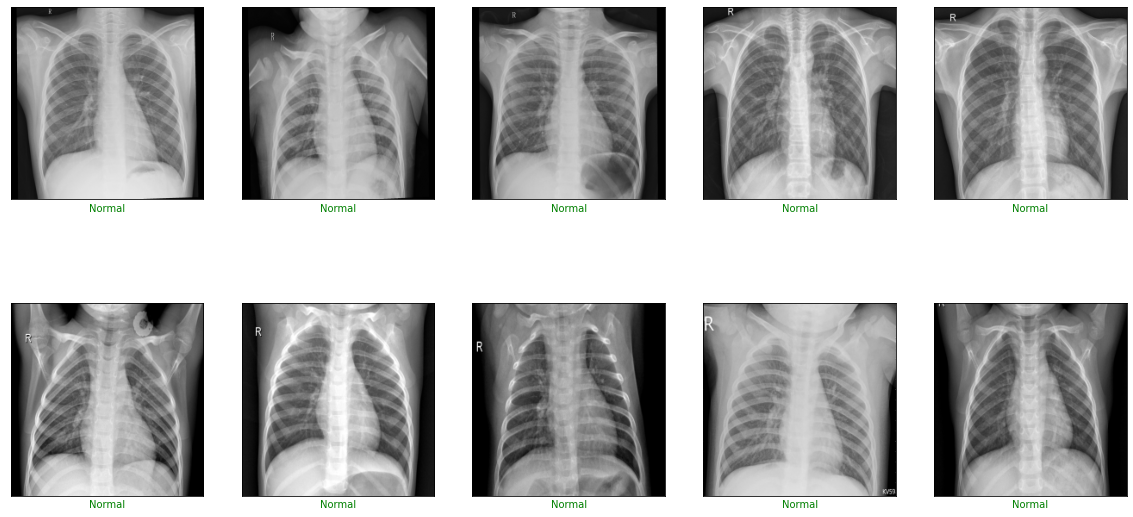

In [32]:
############### 10 Random samples are predicted(green label if model predicts correctly,red label if model predicts wrong) ###############
show_random_examples(x_test,y_test,pred_vgg)

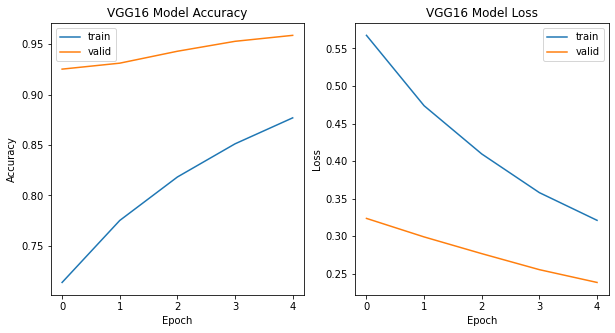

In [34]:
############### Plotting model accuracy and model loss ###############
acc_vgg=h_vgg.history['accuracy']
val_acc_vgg=h_vgg.history['val_accuracy']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(acc_vgg)
plt.plot(val_acc_vgg)
plt.title("VGG16 Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
loss_vgg=h_vgg.history['loss']
val_loss_vgg=h_vgg.history['val_loss']
plt.subplot(1,2,2)
plt.plot(loss_vgg)
plt.plot(val_loss_vgg)
plt.title("VGG16 Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
plt.show()

In [35]:
############### Second model is built using tranfer learning from ResNet50 ###############
def create_model_res():
    prior = ResNet50(
        include_top=False, 
        weights='imagenet',pooling='avg',
        input_shape=(224, 224, 3)
    )
    model = tf.keras.Sequential()
    model.add(prior)
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='sigmoid'))
    #model.layers[0].trainable=False
    model.add(Dropout(0.2))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
model_res=create_model_res()
model_res.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [36]:
############### creating output directory to store models which yield high validation accuracy ###############
if not os.path.isdir('/kaggle/working/model_res/'):
    os.mkdir('/kaggle/working/model_res/')
file_path='/kaggle/working/model_res/'

In [37]:
############### training model built from ResNet50 ###############
%%time
h_res=model_res.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          epochs=3,batch_size=64,
          callbacks=[
        ModelCheckpoint(os.path.join(file_path,'model_{val_accuracy:.3f}.h5'), save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy'),
        EarlyStopping(patience=3, restore_best_weights=True),ReduceLROnPlateau(patience=2)
    ]
)

Train on 1962 samples, validate on 254 samples
Epoch 1/3
1962/1962 [==============================] - 23s 12ms/sample - loss: 1.6381 - accuracy: 0.8800 - val_loss: 1.2076 - val_accuracy: 0.9213
Epoch 2/3
1962/1962 [==============================] - 11s 6ms/sample - loss: 1.6272 - accuracy: 0.8889 - val_loss: 1.2076 - val_accuracy: 0.9213
Epoch 3/3
1962/1962 [==============================] - 11s 6ms/sample - loss: 1.4613 - accuracy: 0.9021 - val_loss: 1.2076 - val_accuracy: 0.9213
CPU times: user 37.1 s, sys: 8.72 s, total: 45.8 s
Wall time: 47.6 s


In [38]:
############### load the model from output directory which has maximum validation accuracy ###############
model_res=tf.keras.models.load_model('/kaggle/working/model_res/model_0.921.h5')

In [39]:
############### prediction on testing data ###############
pred_res=model_res.predict(x_test)

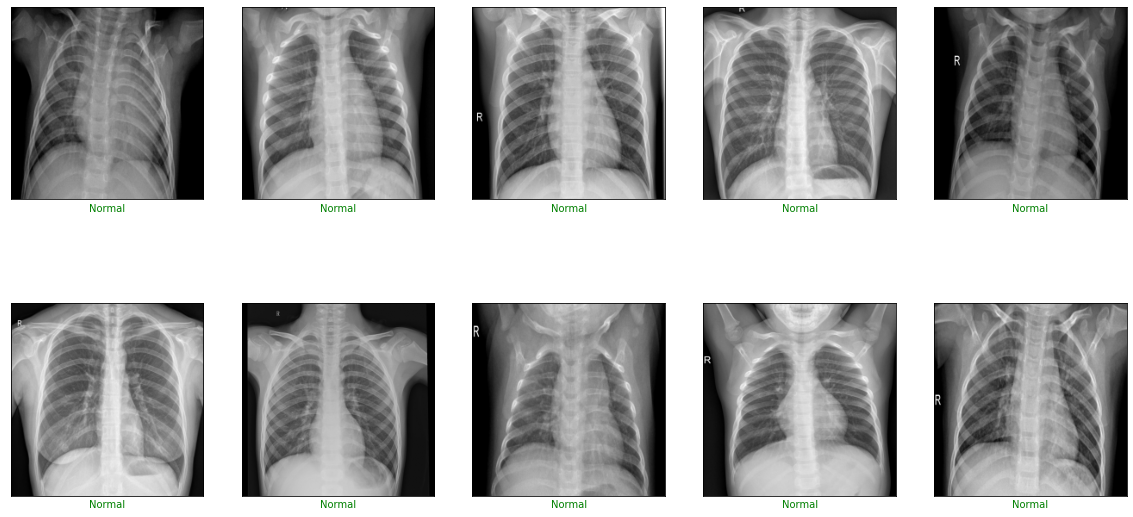

In [41]:
############### 10 Random samples are predicted(green label if model predicts correctly,red label if model predicts wrong) ###############
show_random_examples(x_test,y_test,pred_res)

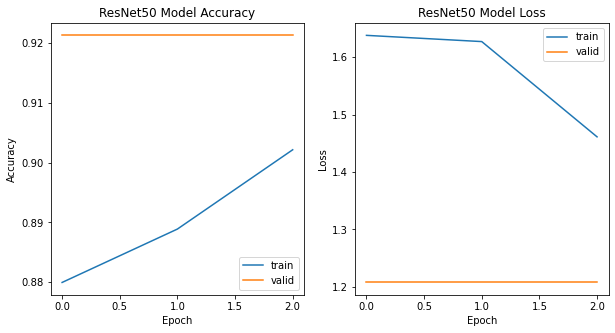

In [43]:
############### Plotting model accuracy and model loss ###############
acc_res=h_res.history['accuracy']
val_acc_res=h_res.history['val_accuracy']
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(acc_res)
plt.plot(val_acc_res)
plt.title("ResNet50 Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
loss_res=h_res.history['loss']
val_loss_res=h_res.history['val_loss']
plt.subplot(1,2,2)
plt.plot(loss_res)
plt.plot(val_loss_res)
plt.title("ResNet50 Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
plt.show()